In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mutual-funds-india-detailed/comprehensive_mutual_funds_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/mutual-funds-india-detailed/comprehensive_mutual_funds_data.csv")

In [3]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [4]:
df.shape

(814, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [6]:
#changing the dtype of some cols from object to float
df = df.drop(["scheme_name", "fund_manager", "amc_name"], axis = 1)
df = df.replace("-", 0)
df = df.astype({"sortino": float, "alpha": float, "sd": float, "beta": float, "sharpe":float})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   min_sip        814 non-null    int64  
 1   min_lumpsum    814 non-null    int64  
 2   expense_ratio  814 non-null    float64
 3   fund_size_cr   814 non-null    float64
 4   fund_age_yr    814 non-null    int64  
 5   sortino        814 non-null    float64
 6   alpha          814 non-null    float64
 7   sd             814 non-null    float64
 8   beta           814 non-null    float64
 9   sharpe         814 non-null    float64
 10  risk_level     814 non-null    int64  
 11  rating         814 non-null    int64  
 12  category       814 non-null    object 
 13  sub_category   814 non-null    object 
 14  returns_1yr    814 non-null    float64
 15  returns_3yr    793 non-null    float64
 16  returns_5yr    647 non-null    float64
dtypes: float64(10), int64(5), object(2)
memory usage: 108.

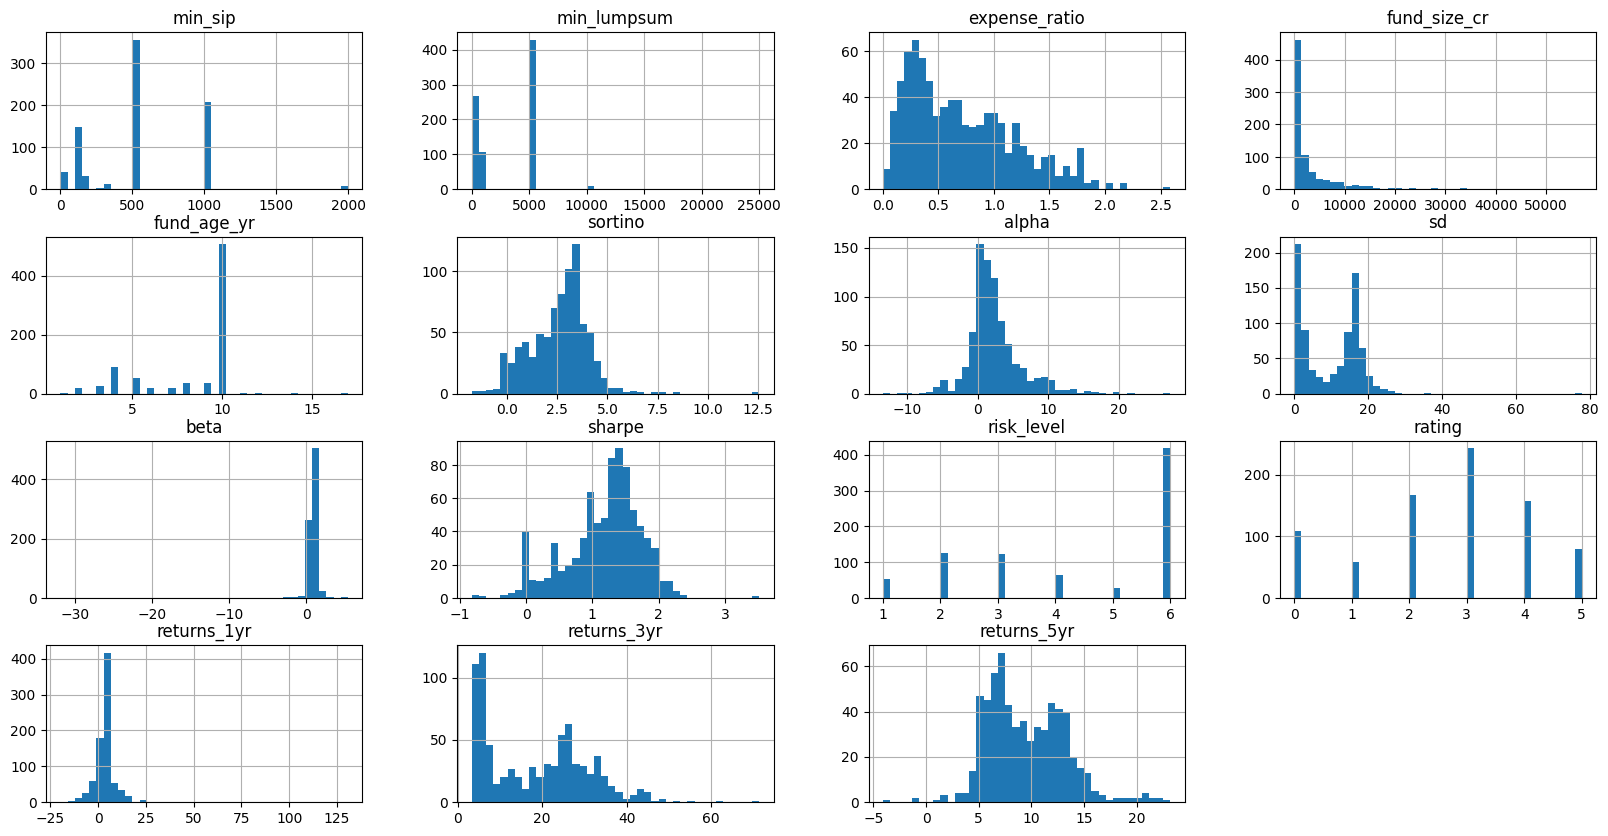

In [7]:
#plotting the distribution of all the numerical cols of the data
num_cols = df.select_dtypes(include=[np.number]).columns
num_cols, len(num_cols)

fig, ax = plt.subplots(figsize = (20,10))
df[num_cols].hist(ax = ax, bins = 40)
plt.show()

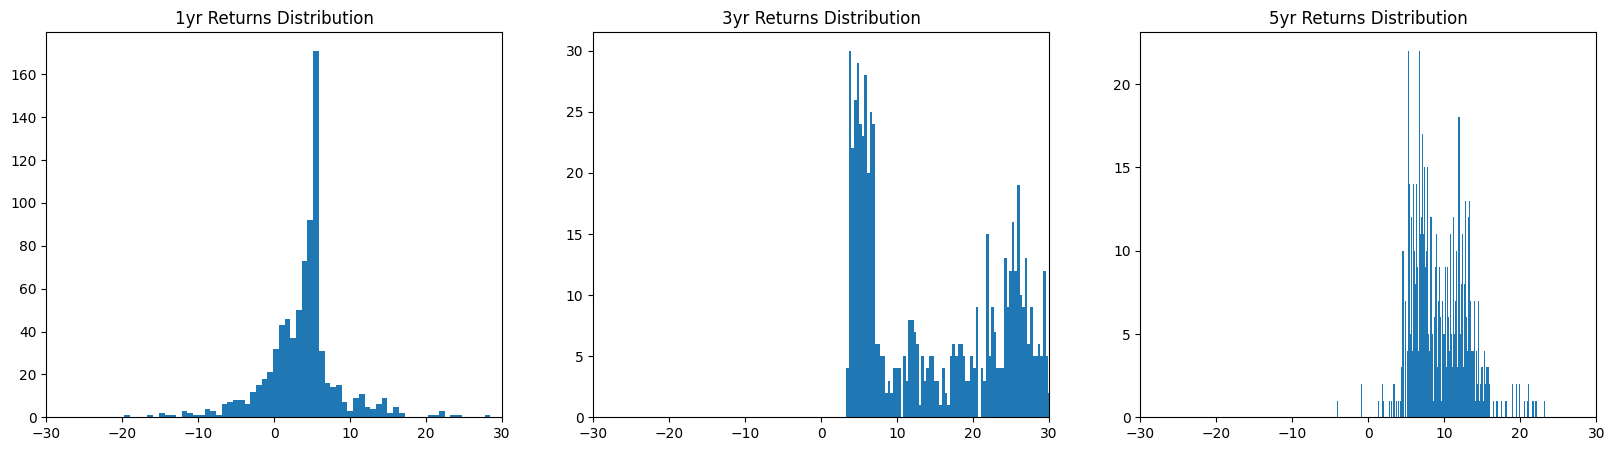

In [8]:
#plotting "returns" seperately
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 5))

ax1.hist(df["returns_1yr"], bins = 200)
ax1.set_xlim(-30, 30)
ax1.set_title("1yr Returns Distribution")

ax2.hist(df["returns_3yr"], bins = 200)
ax2.set_xlim(-30, 30)
ax2.set_title("3yr Returns Distribution")

ax3.hist(df["returns_5yr"], bins = 200)
ax3.set_xlim(-30, 30)
ax3.set_title("5yr Returns Distribution")


plt.show()

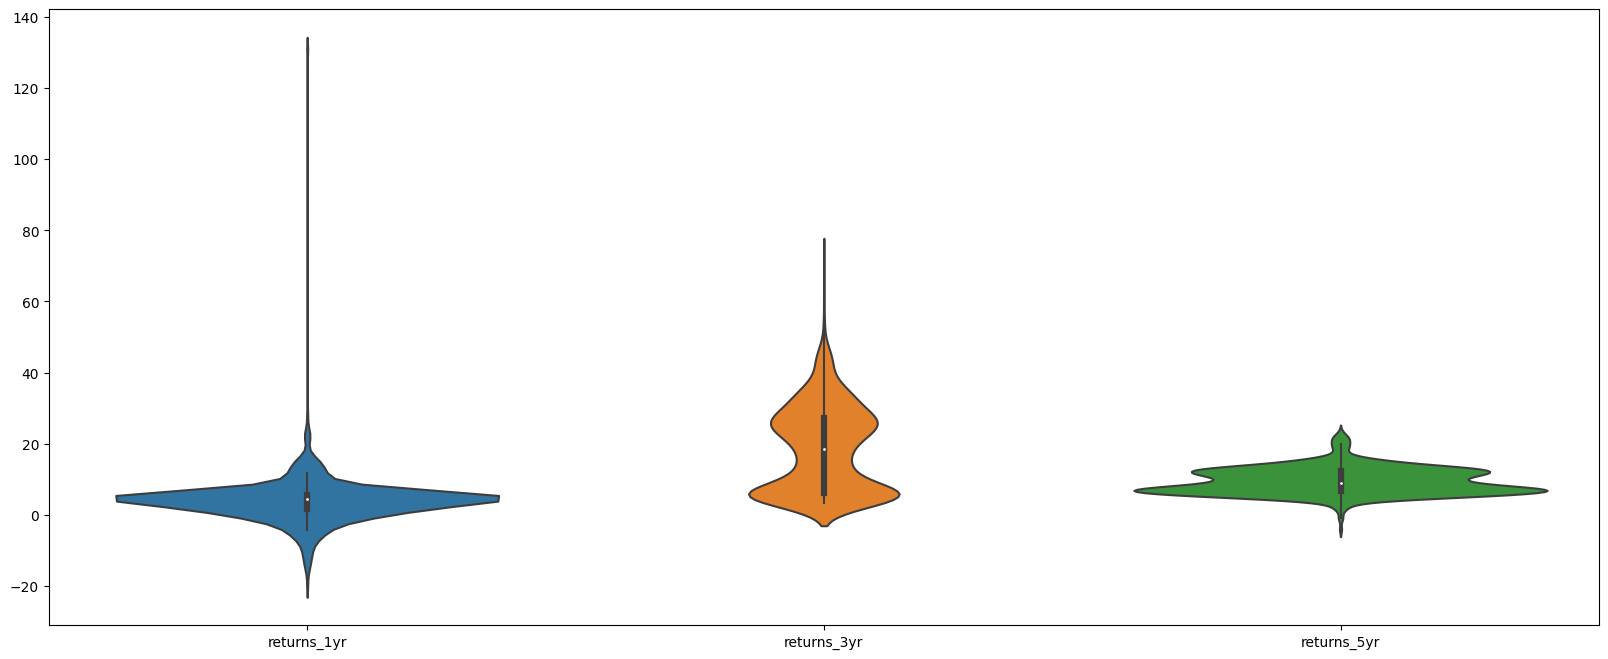

In [9]:
#Violit plots of all the returns
plt.figure(figsize = (20,8))
sns.violinplot(df[["returns_1yr", "returns_3yr", "returns_5yr"]])
plt.show()

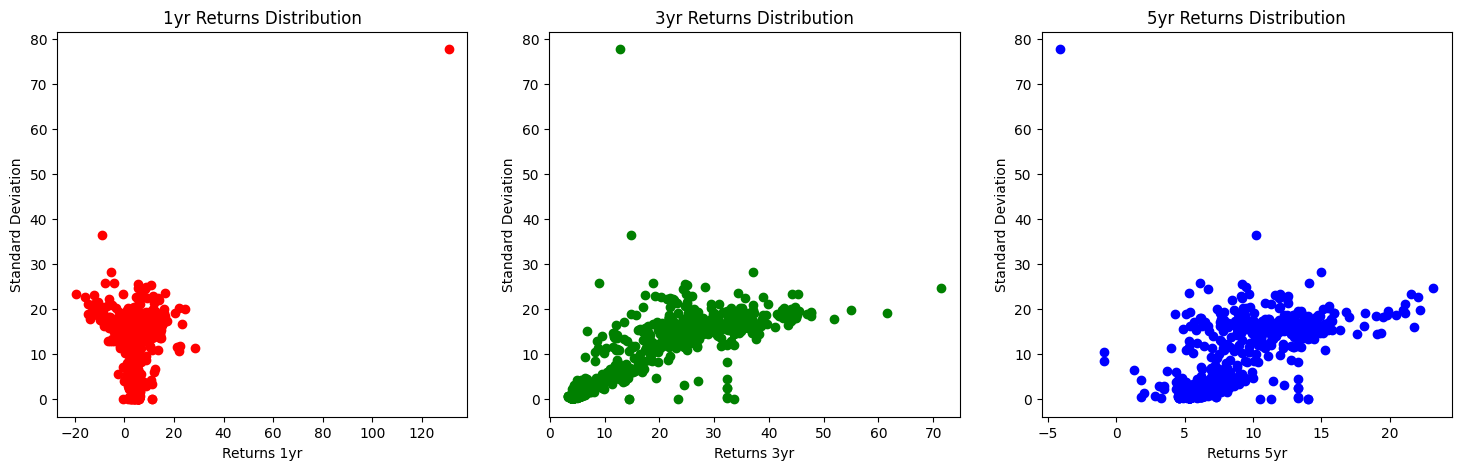

In [10]:
#plotting "returns" seperately
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 5))

ax1.scatter(df["returns_1yr"], df["sd"], color = "r")
ax1.set_xlabel("Returns 1yr")
ax1.set_ylabel("Standard Deviation")
ax1.set_title("1yr Returns Distribution")

ax2.scatter(df["returns_3yr"], df["sd"], color = "g")
ax2.set_xlabel("Returns 3yr")
ax2.set_ylabel("Standard Deviation")
ax2.set_title("3yr Returns Distribution")

ax3.scatter(df["returns_5yr"], df["sd"], color = "b")
ax3.set_xlabel("Returns 5yr")
ax3.set_ylabel("Standard Deviation")
ax3.set_title("5yr Returns Distribution")


plt.show()

## Some Conclusions according to me
> * There seems to be one outlier in all the three returns
> * 1 yr returns are very clearly following a normal distribution.
> * 3 yr returns are all positive, this might be due to the relatively longer term or the overall economy being good
> * 5 yr returns are also somewhat tending to be normal, and are also mostly positive

In [11]:
# Lets first drop the outlier and again plot the scatters
outlier = df[df["sd"] > 70]
outlier

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
89,0,5000,1.54,161.0,8,0.91,-13.36,77.72,-31.86,0.38,4,5,Debt,Credit Risk Funds,130.8,12.8,-4.1


### Although,this is an amazing case for us to see when the standard deviation in the security is huge, how much the returns can varry over time. In this case, 
> $\sigma = 77.72$ 
> Therefore, returns are varying from 130.8 in the first year to 12.8 in the second and -4.1 in the third

## Lets plot again after removing the outlier

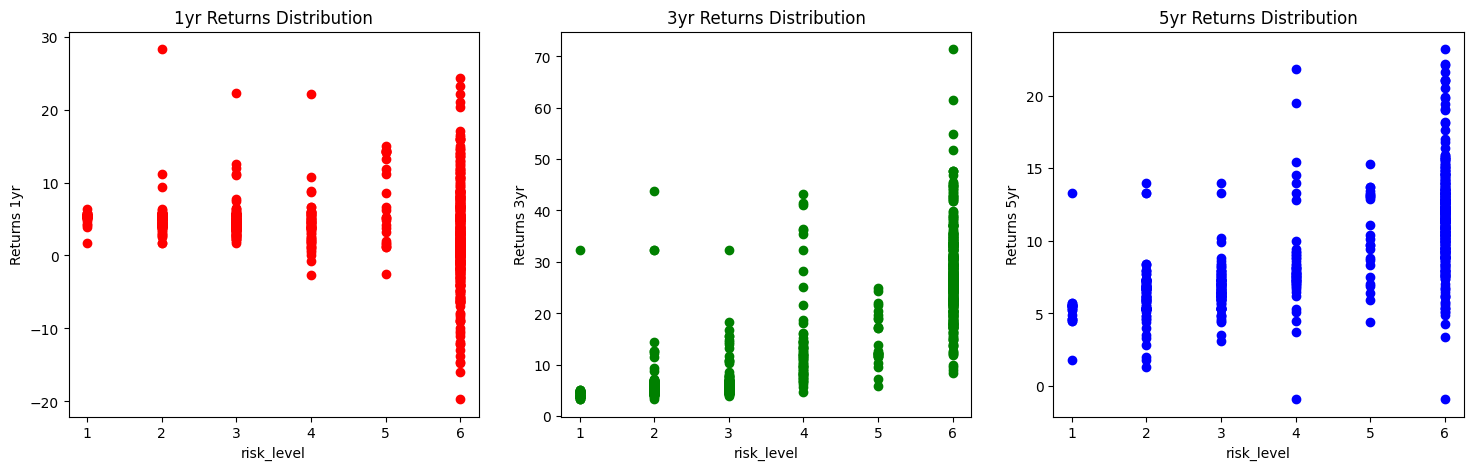

In [12]:
#plotting "returns" seperately
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 5))

against = "risk_level"

ax1.scatter(y = df.drop(df.iloc[89].name)["returns_1yr"], x = df.drop(df.iloc[89].name)[against], color = "r")
ax1.set_ylabel("Returns 1yr")
ax1.set_xlabel(against)
ax1.set_title("1yr Returns Distribution")

ax2.scatter(y = df.drop(df.iloc[89].name)["returns_3yr"], x = df.drop(df.iloc[89].name)[against], color = "g")
ax2.set_ylabel("Returns 3yr")
ax2.set_xlabel(against)
ax2.set_title("3yr Returns Distribution")

ax3.scatter(y = df.drop(df.iloc[89].name)["returns_5yr"],x = df.drop(df.iloc[89].name)[against], color = "b")
ax3.set_ylabel("Returns 5yr")
ax3.set_xlabel(against)
ax3.set_title("5yr Returns Distribution")


plt.show()

### In this plot of returns against the risk level of the fund, it can clearly be seen that with higher risk, there is a possibility of higher returns, but it comes draped with the possibility of losing money as well
> ####  In the 1st plot, we see the higher risk (ie. 6) MF's have even given a negative return of 20 %

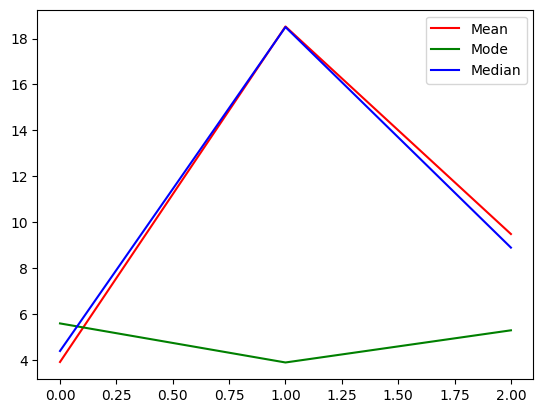

In [13]:
plt.plot([df["returns_1yr"].mean(), df["returns_3yr"].mean() , df["returns_5yr"].mean()], "r", label = "Mean")
plt.plot([df["returns_1yr"].mode(), df["returns_3yr"].mode() , df["returns_5yr"].mode()], "g", label = "Mode")
plt.plot([df["returns_1yr"].median(), df["returns_3yr"].median() , df["returns_5yr"].median()], "b", label = "Median")

plt.legend()

plt.show()

In [14]:
df["sd"].mean()

9.969815724815724

In [15]:
#lets ch.aggck the means of the returns
for i in ["1","3", "5"]:
    col = "returns_"+i+"yr"
    print(f"Mean of Returns over {i} years is: {df[col].mean()}\nStd Dev is: {df[col].var() ** 0.5}\nMode is: {df[col].mode()}\n")

Mean of Returns over 1 years is: 3.921375921375921
Std Dev is: 6.675501654239483
Mode is: 0    5.6
Name: returns_1yr, dtype: float64

Mean of Returns over 3 years is: 18.525346784363176
Std Dev is: 12.1084764809175
Mode is: 0    3.9
Name: returns_3yr, dtype: float64

Mean of Returns over 5 years is: 9.490726429675425
Std Dev is: 3.7140150344091793
Mode is: 0    5.3
Name: returns_5yr, dtype: float64



### The variance (basically risk) should decrease over longer periods ie. 3yrs in this case, but here it has increased significantly. 

### Lets explore the correlations among various columns.
#### Some things I hypothesize beforehand - 
* Alpha, Sharpe and Sortino will have a high correlation with Beta
* Simillarly Rating should show some level of Correlation with Returns
* Standard Deviation should have high correlation with Risk adjusted measures of returns (sortino, alpha) and beta.
* Risk level with returns will have a high $+ve$ corr as well, because more the risk, more the expectation of returns.

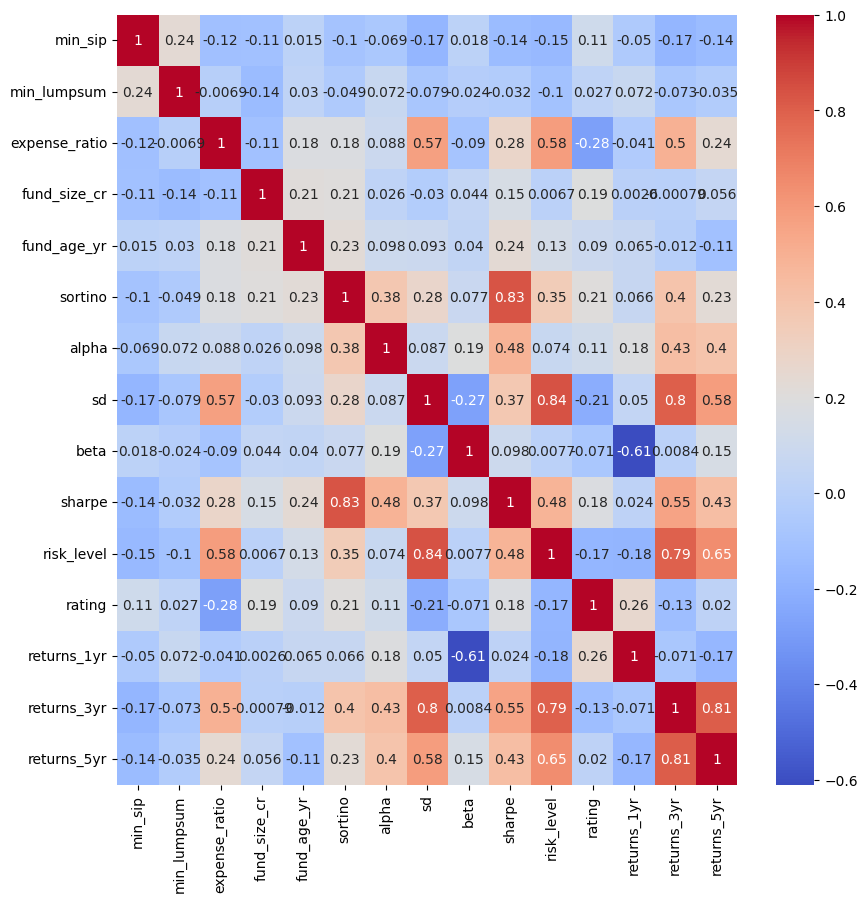

In [16]:
corr = df.select_dtypes(include=["float", "int"]).corr()
#plotting the correlation heatmap

plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.show()

### A couple of observations:
### 1) Corrupt Assumptions
> * Standard Deviation (common measurement of risk) has a high correlation with returns and risk-adjusted return measurements. 
> * Risk also has a huge bearing on returns. This is also seen in the plot of Risk Level against returns above.
### 2) Assumptions that proved to be wrong
> * Rating has little to no bearing on returns, which also proves that although ratings of securities affect their popularity, but if the fundamentals are strong, ratings dont matter.
> * Beta is not having high corr with risk adjusted measures of return either.
### 3) Some other observations.
> * Among $\beta$ and $\sigma$, $\sigma$ has higher corr with all of the return measures as well as risk level.
> * Beta $\beta$ has a high $-ve$ correlation with 1yr Returns. (This will be explored further0

## Lets Model the data and try to predict the returns of stock over the 1 and 5 year time frames

In [17]:
#drop the columns, where 5 yr returns are not available
df_tomodel = df.dropna(axis = 0)
df_tomodel.shape

(647, 17)

In [18]:
y = df_tomodel[["returns_1yr", "returns_5yr"]]
x = df_tomodel.drop(["returns_1yr", "returns_5yr", "returns_3yr", "category", "sub_category"], axis = 1)

In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_, y_, test_size=0.2, random_state=42)
print(f"Traning Data: {x_train.shape}, {y_train.shape}\n Validation Data: {x_val.shape}, {y_val.shape} \n Test Data: {x_test.shape}, {y_test.shape}")

Traning Data: (517, 12), (517, 2)
 Validation Data: (104, 12), (104, 2) 
 Test Data: (26, 12), (26, 2)


In [21]:
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)
x_val_norm = scaler.transform(x_val)
x_test_norm = scaler.transform(x_test)

### Here, we are trying a simple ann, with two output coluns, because we need two different outputs for the data.
> The model, will have to be simple because the data is not too complex, so in order to avoid overfitting, we will use simpler networks

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [23]:
#Converting the data into tensors.

train_features = torch.tensor(x_train_norm, dtype = torch.float32)
train_target = torch.tensor(y_train.to_numpy(), dtype = torch.float32)


val_features = torch.tensor(x_val_norm, dtype = torch.float32)
val_target = torch.tensor(y_val.to_numpy(),dtype = torch.float32)

test_features = torch.tensor(x_test_norm,dtype = torch.float32)
test_target = torch.tensor(y_test.to_numpy(), dtype = torch.float32)

print(f"Traning Data: {train_features.shape}, {train_target.shape}\n Validation Data: {val_features.shape}, {val_target.shape} \n Test Data: {test_features.shape}, {test_target.shape}")

Traning Data: torch.Size([517, 12]), torch.Size([517, 2])
 Validation Data: torch.Size([104, 12]), torch.Size([104, 2]) 
 Test Data: torch.Size([26, 12]), torch.Size([26, 2])


In [24]:
# creating pytorch data sets
train = TensorDataset(train_features,train_target)
val = TensorDataset(val_features, val_target)
test = TensorDataset(test_features,test_target)

In [25]:
#defining the model
class CreditModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CreditModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
#         self.prelu1 = nn.PReLU(num_parameters = 1)
#         self.fc2 = nn.Linear(hidden_size, 12)
        self.prelu2 = nn.PReLU(num_parameters = 1)
        self.fc3 = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        x = self.fc1(x)
#         x = self.prelu1(x)
#         x = self.fc2(x)
        x = self.prelu2(x)
        x = self.fc3(x)
        return x

In [26]:
#setting up the gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [27]:
#Initialising the model
input_size = train_features.shape[1]  # Number of input features
hidden_size = 24 
output_size = 2  # Two output variables
print(input_size, hidden_size, output_size)

model = CreditModel(input_size, hidden_size, output_size)

#moving the model to the gpu
model = model.to(device)
print(model)

12 24 2
CreditModel(
  (fc1): Linear(in_features=12, out_features=24, bias=True)
  (prelu2): PReLU(num_parameters=1)
  (fc3): Linear(in_features=24, out_features=2, bias=True)
)


In [28]:
#setting some of the other hyperparams
iterations = 10000
batch_size = 50
epochs = int(iterations/(int(train_features.shape[0])/batch_size))
print(f"epochs: {epochs}")

# Cross Entropy Loss 
error = nn.MSELoss()

# SGD Optimizer
alpha = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=alpha)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = True)
val_loader = DataLoader(val, batch_size = val_features.shape[0], shuffle = True)
test_loader = DataLoader(test, batch_size = test_features.shape[0], shuffle = True)

epochs: 967


In [29]:
count = 0
loss_list = []
iterations = []
pev_list = []

for epoch in range(epochs):
    for train_feature, ground_truth_train in train_loader:
        
        #moving the batch to GPU
        train_feature, ground_truth_train = train_feature.to(device), ground_truth_train.to(device)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        y_hat_train = model(train_feature)
        
        # Calculate softmax and cross entropy loss
        loss = error(y_hat_train, ground_truth_train)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        #for every 100 epochs, we will calculate the validation accuracy
        if count % 100 == 0:
            
#             for val_feature, val_target in val_loader:
                
#                 val_feature, val_target = val_feature.to(device), val_target.to(device)
                
            #forward Prop
#             y_hat_val = model(val_feature)

            #calculating validation loss
#             loss_val = error(y_hat_val, val_target)
            pev = 1.0 - (torch.var(ground_truth_train - y_hat_train) / torch.var(ground_truth_train))

            loss_list.append(loss.data)
            iterations.append(count)
            pev_list.append(pev)
            if count%500 == 0:
                
                print(f"Iterations: {count} Training_loss: {loss.data} PEV:{pev} ")
                

Iterations: 500 Training_loss: 58.5736198425293 PEV:0.004460394382476807 
Iterations: 1000 Training_loss: 41.57984161376953 PEV:0.09672456979751587 
Iterations: 1500 Training_loss: 25.827238082885742 PEV:0.220045268535614 
Iterations: 2000 Training_loss: 20.670570373535156 PEV:0.3364216685295105 
Iterations: 2500 Training_loss: 15.137531280517578 PEV:0.3930589556694031 
Iterations: 3000 Training_loss: 13.062714576721191 PEV:0.4344494342803955 
Iterations: 3500 Training_loss: 13.69436264038086 PEV:0.4651711583137512 
Iterations: 4000 Training_loss: 9.866382598876953 PEV:0.5506064891815186 
Iterations: 4500 Training_loss: 15.045302391052246 PEV:0.41227221488952637 
Iterations: 5000 Training_loss: 17.0274658203125 PEV:0.40966933965682983 
Iterations: 5500 Training_loss: 9.921256065368652 PEV:0.477586030960083 
Iterations: 6000 Training_loss: 17.903785705566406 PEV:0.3639727234840393 
Iterations: 6500 Training_loss: 11.76661205291748 PEV:0.41528022289276123 
Iterations: 7000 Training_loss:

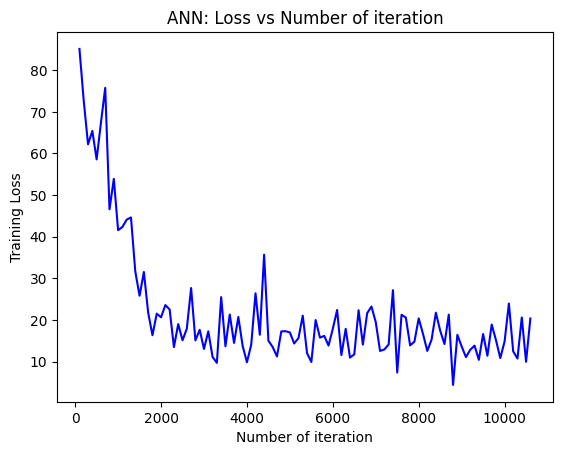

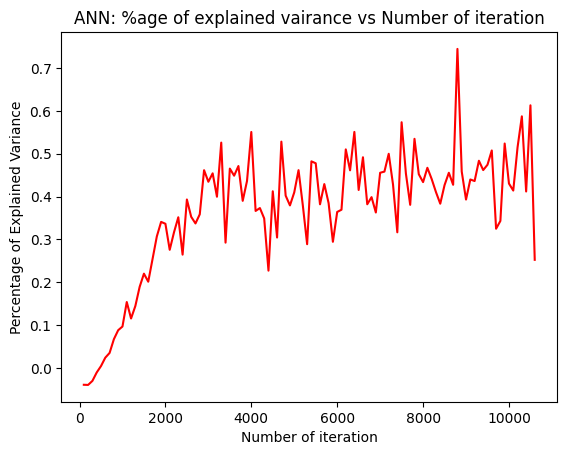

In [30]:
#tconverting into tensors to be able to plot
loss_tensor = torch.tensor(loss_list, dtype=torch.float32)
pev_tensor = torch.tensor(pev_list, dtype=torch.float32)
iteration_tensor = torch.tensor(iterations, dtype = torch.float32)
# visualization loss 
plt.plot(iteration_tensor.numpy(), loss_tensor.numpy(), color = "blue")
plt.xlabel("Number of iteration")
plt.ylabel("Training Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_tensor.numpy(), pev_tensor.numpy(),color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Percentage of Explained Variance")
plt.title("ANN: %age of explained vairance vs Number of iteration")
plt.show()

In [31]:
#checking on validation set
for val_feature, ground_truth_val in val_loader:
    val_feature, ground_truth_val = val_feature.to(device), ground_truth_val.to(device)
    y_hat_val = model(val_feature)
    loss_val = error(y_hat_val, ground_truth_val)
#     print(loss_val)
    

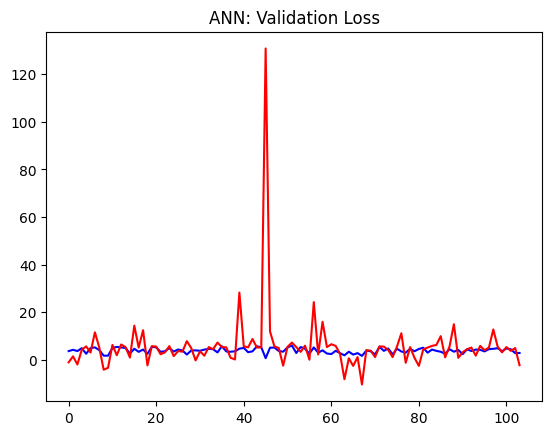

In [32]:
#tconverting into tensors to be able to plot
y_hat_tensor = torch.tensor(y_hat_val.data, dtype=torch.float32)
# pev_tensor = torch.tensor(pev_list, dtype=torch.float32)
# iteration_tensor = torch.tensor(iterations, dtype = torch.float32)
# visualization loss 
# print(y_hat_tensor.cpu())
yhat_val = y_hat_tensor.cpu().numpy()
ground_truth = ground_truth_val.cpu().numpy()
# print(yhat_val[:,0])
plt.plot(yhat_val[:,0], color = "blue")
plt.plot(ground_truth[:,0], color = "red")
# plt.xlabel("Number of iteration")
# plt.ylabel("Training Loss")
plt.title("ANN: Validation Loss")
plt.show()
